# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *J*

**Names:**
* *Ann-Kristin Bergmann*
* *Nephele Aesopou*
* *Ewa Miazga*
* *Tan Mai Vu*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [5]:
#imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np

In [6]:
# Function that loads the networks from the data folder
def load_data(file_name, comment, is_header):
    network = pd.read_csv(f'../data/{file_name}', comment = comment, header = is_header)
    network.columns = ['fromNode', 'toNode']
    return network

In [7]:
network1 = load_data('network1.csv', '#', None)
network1.head()

,fromNode,toNode
0,0,11932
1,1,5128
2,2,7008
3,3,10476
4,4,9671


#### Exercise 2.2:  Node degree distribution

In [8]:
def create_graph(network):
    G = nx.Graph()
    G = nx.from_pandas_edgelist(network, 'fromNode', 'toNode')
    return G

In [9]:
G = create_graph(network1)

In [10]:
# Get the number of edges and the number of nodes of the graph.
def graph_info(graph):
    num_edges = G.number_of_edges()
    num_nodes = G.number_of_nodes()
    return f'num of edges: {num_edges}, num of nodes: {num_nodes}'

In [11]:
graph_info(G)

'num of edges: 18584, num of nodes: 13033'

In [12]:
def get_degrees_count(G):
    degree_sequence = sorted((val for (node, val) in G.degree()), reverse=False)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    return deg, cnt

# Given the graph, plot the node degree vs. its frequency in a log-log plot.
def display_degree_freq(G):
    deg, cnt = get_degrees_count(G)

    fig, ax = plt.subplots(ncols=1, figsize=(16, 4))
    plt.plot(np.log(deg), np.log(cnt), color='crimson', marker='.', zorder=2)
    ax.set_ylabel('degree frequency (log)')
    ax.set_xlabel('degree (log)')
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\nephe\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

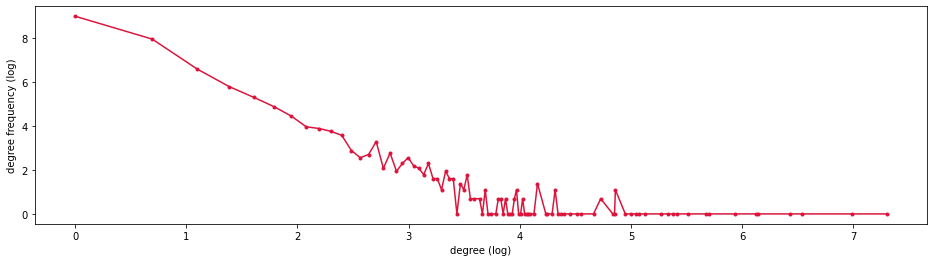

In [13]:
display_degree_freq(G)

In [24]:
# Plot the degree of the node vs. its cumulative frequency
def display_cum_degree_freq(G):
    deg, cnt = get_degrees_count(G)
    cum_deg = np.cumsum(deg)
    fig, ax = plt.subplots(ncols=1, figsize=(16, 4))
    plt.plot(cum_deg, cnt, color='crimson', marker='.', zorder=2)
    ax.set_ylabel('degree frequency')
    ax.set_xlabel('degree')
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\nephe\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

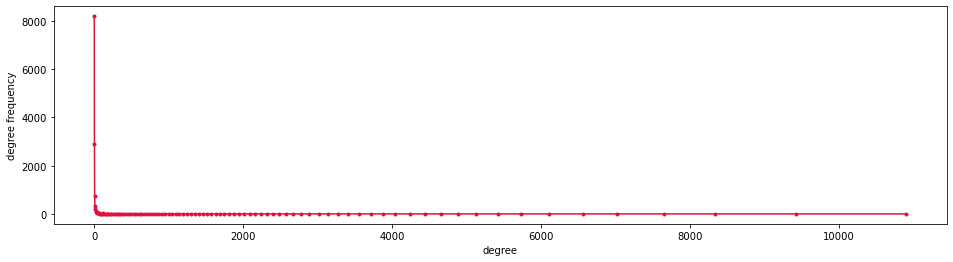

In [26]:
display_cum_degree_freq(G)
# This plot reminds us of the power law, hence we investigate further.


In [46]:
# Plot the degree vs. the probability that a node has greater or equal degree using log-log plot.
def display_power_law_plot(G):
    deg, cnt = get_degrees_count(G)
    #Compute the cumulative sum of the degree counts
    cum_degree_counts = np.cumsum(cnt)
    # number of nodes with degree >= x
    cum_freq = np.flip(cum_degree_counts)
    plt.loglog(deg, cum_freq)
    plt.xlabel("Node degree d")
    plt.ylabel("P(node has degree >= d)")


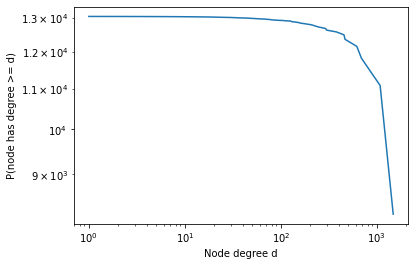

In [47]:
display_power_law_plot(G)

1. What kind of plot do you think is useful for this task?
**It could be a histogram, scatter or bar graph. It should show how frequent degrees appears in the dataset.**

2. Can you list some of the properties of the degree distribution?
**An important graph property is the degree distribution function P (k), that describes the probability to find a node with k edges**

3. Is it close to a well-known probability distribution? If so, provide an estimation of its
parameter(s)?
**Probably it looks a little bit like a power-law distribution**
**A scale-free graph is instead characterized by a power-law degree distribution P (k) = Ak −γ , usually with 2 < γ < 3. A power-law distribution appears as a straight line in a double-logarithmic plot. In a scale-free graph, low degree nodes are the most frequent ones, but there are also a few highly connected nodes, usually called hubs.**

In [14]:
# This is a very time-expensive function
# Draw the graph
#def draw_graph(G):
    #nx.draw(G)

#### Exercise 2.3: Giant component

In [35]:
def calc_connected_components_num(G):
    return nx.number_connected_components(G)

In [36]:
print("Number of connected components in G is", calc_connected_components_num(G))

Number of connected components in G is 192


In [43]:
# Calculate the average degree (c) of the graph. Return true, i.e. the graph has a giant component, if (c>1).
def is_giant_component(G):
    deg, cnt = get_degrees_count(G)
    np_cnt = np.array(cnt)
    np_deg = np.array(deg)
    c = sum(np_cnt * np_deg) / len(G)
    print(f'Average graph degree: {c}')
    return c > 1

def giant_component_info(G):
    if is_giant_component(G):
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        G0 = G.subgraph(Gcc[0])
        print("The giant component is a", G0)
    else:
        print("There is no giant component")

In [44]:
giant_component_info(G)

Average graph degree: 2.8518376429064682
The giant component is a Graph with 12576 nodes and 18317 edges


#### Exercise 2.4: Short paths & Small-worlds

In [19]:
def get_avg_paths_length(G):
    avg_length = []
    for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
        avg_length.append(nx.average_shortest_path_length(C))
    return sum(avg_length) / len(avg_length)

In [17]:
# Average length of connection between every two nodes in graph
get_avg_paths_length(G)

1.1072818079387936

In [20]:
def get_shortest_paths(G):
    shortest_paths = list(nx.shortest_path_length(G))
    paths_list = []
    for node in shortest_paths:
        temp = [value for value in node[1].values()]
        paths_list.extend(temp)
    return paths_list

In [23]:
paths_list = get_shortest_paths(G)

In [20]:
def display_shortest_paths_dist(paths_list):
    degreeCount = collections.Counter(paths_list)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots(ncols=1, figsize=(16, 4))
    ax.bar(deg, cnt)
    ax.set_ylabel('count (10^7)')
    ax.set_xlabel('shortest path length')
    return plt
    #plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\nephe\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

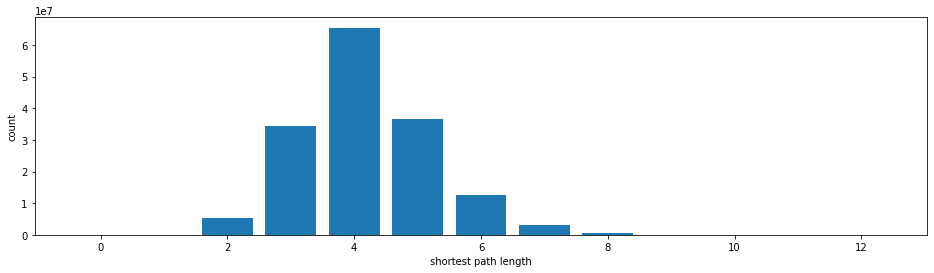

In [21]:
display_shortest_paths_dist(paths_list)

In [21]:
# Find the average number of nodes reachable within a distance r of any other node in the network.
def reachable_r(r, paths_list):
    how_many = 0
    reachable = [1 for node in paths_list if node <=r]
    #print(sum(reachable))
    #print(len(paths_list))
    return (sum(reachable) / len(paths_list)) * 100

In [45]:
print("Average # of noder reachable within distance=2 is", reachable_r(2, paths_list))
print("Average # of noder reachable within distance=6 is", reachable_r(6, paths_list))
print("Average # of noder reachable within distance=10 is", reachable_r(10, paths_list))

Average # of noder reachable within distance=2 is 3.458302466620528
Average # of noder reachable within distance=6 is 97.69460707504733
Average # of noder reachable within distance=10 is 99.99949417402605


According to the above, we can agree with the theory of Duncan Watts, relating to Small Worlds. It is clear that 98% of the nodes in the graph are reachable within a distance of 6 edges = "six degrees of separation".

#### Exercise 2.5: Network comparison

In [26]:
network2 = load_data('network2.csv', '#', None)
network2.head()

,fromNode,toNode
0,135627,135630
1,135627,135623
2,135627,135625
3,135627,135626
4,137038,137040


**Properties of previous network**

In [27]:
# Create the graph of second network
G2 = create_graph(network2)
# Calculate num of edges and nodes in the graph
graph_info(G2)

<module 'matplotlib.pyplot' from 'c:\\Users\\nephe\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

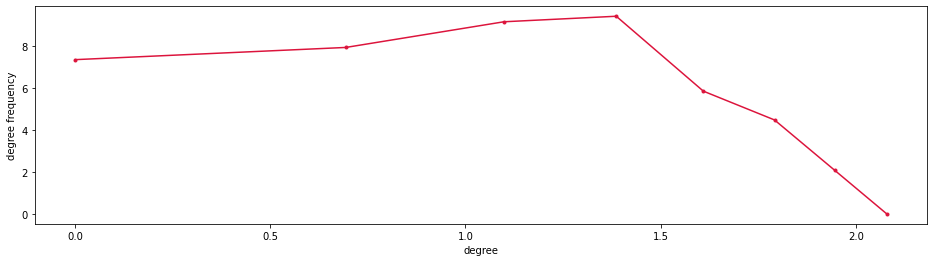

In [29]:
# Distribution of degrees in the network
display_degree_freq(G2)

In [30]:
# Draw the graph
#draw_graph(G2)

In [31]:
# Number of connected components in graph
calc_connected_components_num(G2)

5

In [32]:
# Find giant component of G2 and show its properties, if it exists.
giant_component_info(G2)

average graph degree: 3.2790294627383014
Graph with 26481 nodes and 43437 edges


In [33]:
# Average length of connection between every two nodes in graph
get_avg_paths_length(G2)

KeyboardInterrupt: 

In [34]:
paths_list_G2 = get_shortest_paths(G2)
display_shortest_paths_dist(paths_list_G2)

KeyboardInterrupt: 

In [ ]:
r = 2
reachable_r(r, paths_list_G2)

In [ ]:
r = 6
reachable_r(r, paths_list_G2)

In [ ]:
r = 10
reachable_r(r, paths_list_G2)

#### Exercise 2.6: Network identification

I suppose network1 is the network of roads around the city of New-York, most of nodes can be achived within path which is not longer than 6 nodes. So another one is the network of internet, it shows that not many of routers are accesible by wire, eventhough there are much more edges then in network1.